## Load Libraries and the Dataset
-----------------------------------------------------------------------------

In [195]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Load Datasets into DataFrames
amzn_df = pd.read_csv('AMZN.csv')
googl_df = pd.read_csv('GOOGL.csv')
msft_df = pd.read_csv('MSFT.csv')

## Data Validation
-----------------------------------------------------------------------------

In [199]:
amzn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000
1,2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000
2,2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000
3,2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000
4,2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000


In [200]:
googl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [201]:
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.574516,52899300
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.272108,48294400
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.855268,52521100
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.814409,37110400
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.699978,44703100


## Data Preprocessing
-----------------------------------------------------------------------------

### Check for Missing Values

In [202]:
# Print number of missing values of features in datasets
print("Missing values in AMZN dataset:")
print(amzn_df.isnull().sum())

Missing values in AMZN dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [203]:
# Print number of missing values of features in datasets
print("Missing values in GOOGL dataset:")
print(googl_df.isnull().sum())

Missing values in GOOGL dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [204]:
# Print number of missing values of features in datasets
print("Missing values in MSFT dataset:")
print(msft_df.isnull().sum())

Missing values in MSFT dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Check for Duplicated Values

In [205]:
# Print number of duplicated rows in datasets
print("Duplicated Rows in AMZN dataset:")
print(amzn_df.duplicated().sum())

Duplicated Rows in AMZN dataset:
0


In [206]:
print("Duplicated Rows in GOOGL dataset:")
print(googl_df.duplicated().sum())

Duplicated Rows in GOOGL dataset:
0


In [207]:
print("Duplicated Rows in MSFT dataset:")
print(msft_df.duplicated().sum())

Duplicated Rows in MSFT dataset:
0


### Check Data Types of Features

In [208]:
# Print data types of features in datasets
print("\nData types in AMZN dataset:")
print(amzn_df.dtypes)


Data types in AMZN dataset:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [209]:
print("\nData types in GOOGL dataset:")
print(googl_df.dtypes)


Data types in GOOGL dataset:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [210]:
print("\nData types in MSFT dataset:")
print(msft_df.dtypes)


Data types in MSFT dataset:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


## Feature Engineering
-----------------------------------------------------------------------------

### SMA, EMA, and MACD

In [211]:
# Define the periods for SMA, EMA, and MACD
sma_period = 20
ema_period = 12
macd_short_period = 12
macd_long_period = 26
signal_period = 9

# Function to calculate SMA
def calculate_sma(data, period):
    return data['Close'].rolling(window=period).mean()

# Function to calculate EMA
def calculate_ema(data, period):
    return data['Close'].ewm(span=period, adjust=False).mean()

# Function to calculate MACD
def calculate_macd(data, short_period, long_period, signal_period):
    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal_line

# Function to add indicators to dataframe
def add_indicators(data):
    data['SMA'] = calculate_sma(data, sma_period)
    data['EMA'] = calculate_ema(data, ema_period)
    data['MACD'], data['Signal Line'] = calculate_macd(data, macd_short_period, macd_long_period, signal_period)

# List of dataframes
dataframes = [amzn_df, googl_df, msft_df]

for df in dataframes:
    add_indicators(df)

In [212]:
amzn_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,MACD,Signal Line
0,2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000,NaN,12.865500,0.000000,0.000000
1,2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000,NaN,12.874500,0.004667,0.000933
2,2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000,NaN,12.887269,0.010942,0.002935
3,2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000,NaN,12.969689,0.052868,0.012922
4,2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000,NaN,13.023429,0.076817,0.025701
5,2013-01-09,13.4085,13.4750,13.2700,13.3175,13.3175,45312000,NaN,13.068671,0.094585,0.039478
6,2013-01-10,13.4270,13.4370,13.1150,13.2670,13.2670,57268000,NaN,13.099183,0.103400,0.052262
7,2013-01-11,13.2550,13.4215,13.2055,13.3970,13.3970,48266000,NaN,13.145001,0.119498,0.065709
8,2013-01-14,13.4000,13.7130,13.3770,13.6365,13.6365,85500000,NaN,13.220616,0.149855,0.082538
9,2013-01-15,13.5340,13.6365,13.4650,13.5950,13.5950,46538000,NaN,13.278214,0.168620,0.099755


In [213]:
googl_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,MACD,Signal Line
0,2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348,NaN,18.099348,0.000000,0.000000
1,2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272,NaN,18.100965,0.000838,0.000168
2,2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460,NaN,18.157389,0.030033,0.006141
3,2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772,NaN,18.192734,0.046136,0.014140
4,2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956,NaN,18.217060,0.055332,0.022378
5,2013-01-09,18.325075,18.477226,18.233232,18.471472,18.471472,80907012,NaN,18.256200,0.071528,0.032208
6,2013-01-10,18.589338,18.643644,18.355856,18.555555,18.555555,73354572,NaN,18.302255,0.090110,0.043788
7,2013-01-11,18.568569,18.579329,18.425926,18.518269,18.518269,51356592,NaN,18.335488,0.100667,0.055164
8,2013-01-14,18.443443,18.573574,18.076826,18.099348,18.099348,114441444,NaN,18.299159,0.074373,0.059006
9,2013-01-15,18.001251,18.393393,17.820320,18.141392,18.141392,156950892,NaN,18.274887,0.056278,0.058460


In [214]:
msft_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,MACD,Signal Line
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.574516,52899300,NaN,27.620001,0.000000,0.000000
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.272108,48294400,NaN,27.563078,-0.029516,-0.005903
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.855268,52521100,NaN,27.436450,-0.092988,-0.023320
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.814409,37110400,NaN,27.321612,-0.145646,-0.047785
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.699978,44703100,NaN,27.202902,-0.196410,-0.077510
5,2013-01-09,26.719999,26.750000,26.559999,26.700001,21.822575,49047900,NaN,27.125533,-0.221979,-0.106404
6,2013-01-10,26.650000,26.980000,26.290001,26.459999,21.626421,71431300,NaN,27.023143,-0.258627,-0.136849
7,2013-01-11,26.490000,26.930000,26.280001,26.830000,21.928829,55512100,NaN,26.993429,-0.254877,-0.160454
8,2013-01-14,26.900000,27.080000,26.760000,26.889999,21.977873,48324400,NaN,26.977516,-0.244248,-0.177213
9,2013-01-15,26.830000,27.290001,26.830000,27.209999,22.239412,48244500,NaN,27.013283,-0.207610,-0.183292


### Drop Rows with Missing Values

In [215]:
amzn_df.dropna(inplace=True)
googl_df.dropna(inplace=True)
msft_df.dropna(inplace=True)

## Exploratory Data Analysis
-----------------------------------------------------------------------------

### Summary Statistics

In [216]:
# Summary statistics
print(amzn_df.describe())
print(googl_df.describe())
print(msft_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2749.000000  2749.000000  2749.000000  2749.000000  2749.000000   
mean     78.550289    79.459135    77.556299    78.525456    78.525456   
std      52.875475    53.524193    52.168130    52.837255    52.837255   
min      12.447000    12.646500    12.287500    12.411500    12.411500   
25%      27.089500    27.348499    26.666500    26.990000    26.990000   
50%      80.917503    81.746498    79.944000    80.972000    80.972000   
75%     121.491501   123.099998   119.302498   121.180000   121.180000   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             Volume          SMA          EMA         MACD  Signal Line  
count  2.749000e+03  2749.000000  2749.000000  2749.000000  2749.000000  
mean   7.839412e+07    78.048303    78.248788     0.340217     0.336221  
std    4.131847e+07    52.678939    52.708526     2.073920     1.935834  
min    1.762600e+07    13.019450    1

### Trend Analysis

In [217]:
# Define dataframes and their labels for identification
datasets = {
    'Amazon (AMZN)': amzn_df,
    'Google (GOOGL)': googl_df,
    'Microsoft (MSFT)': msft_df
}

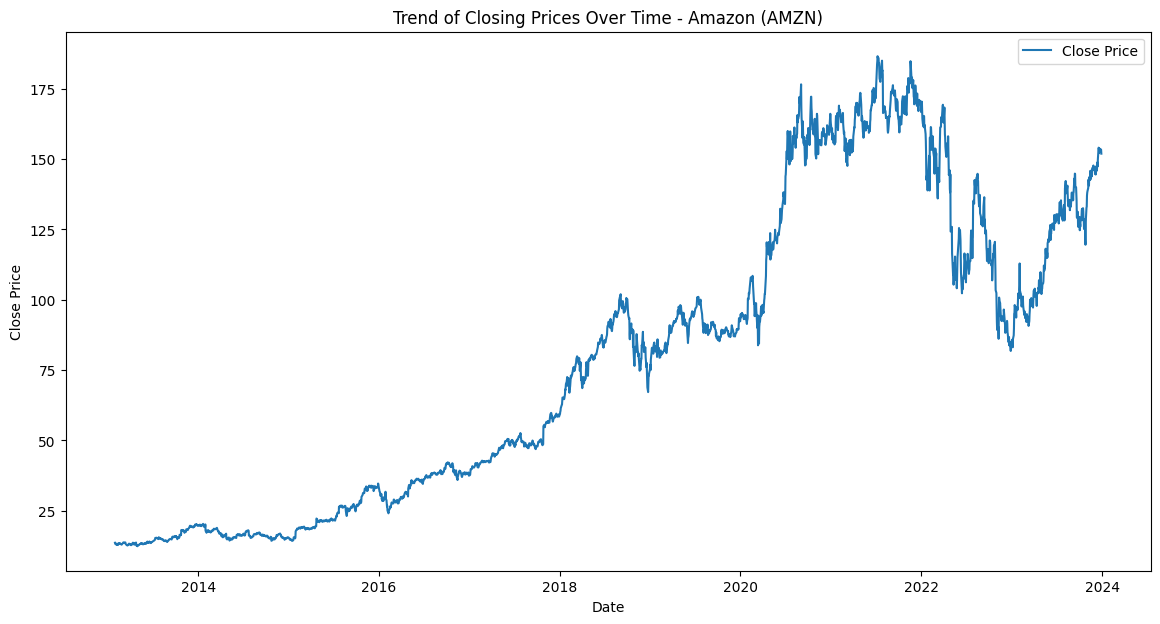

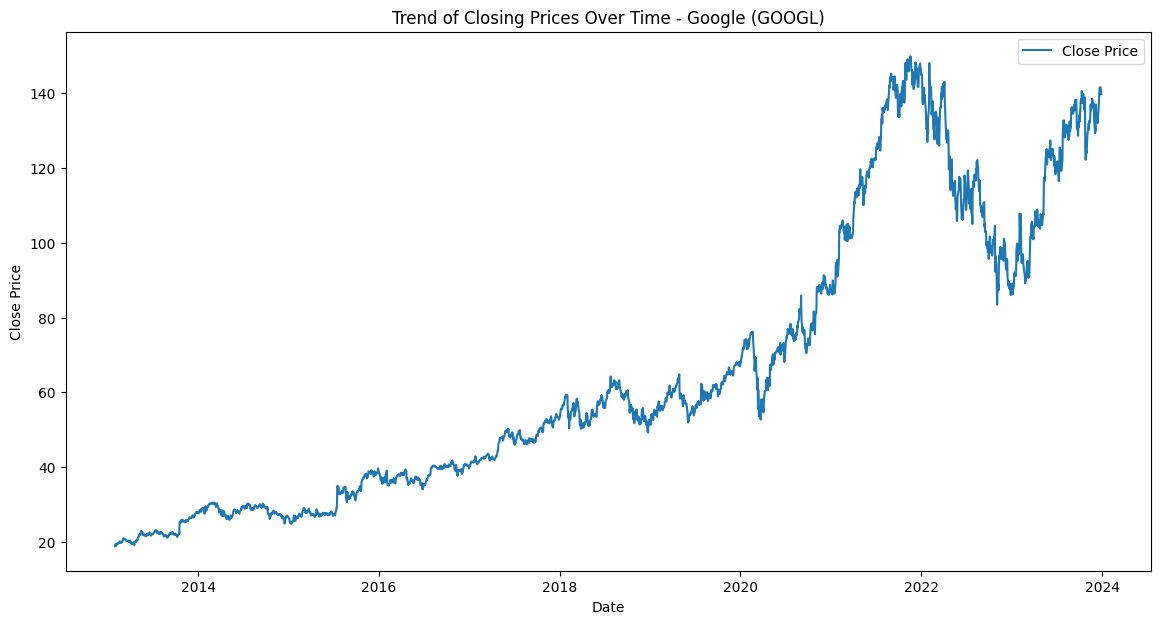

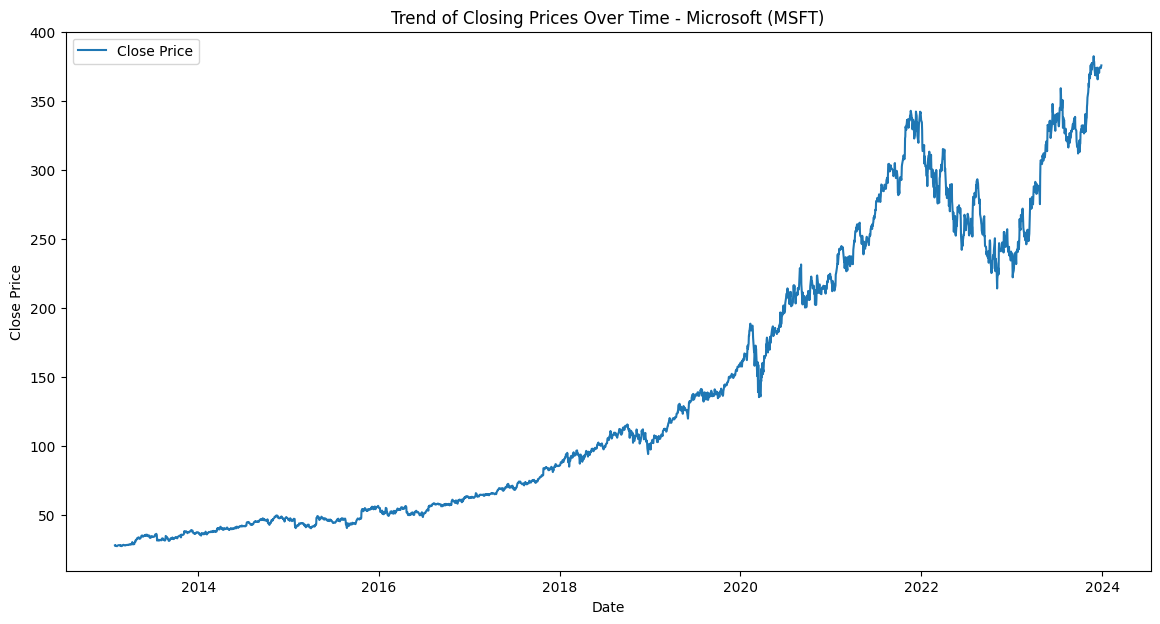

In [218]:
# Closing Prices over Time
# Loop through each dataset to plot trends
for label, df in datasets.items():
    # Ensure Date is of datetime type for better plotting
    df['Date'] = pd.to_datetime(df['Date'])

    # Plotting the trend of closing prices
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.title(f'Trend of Closing Prices Over Time - {label}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

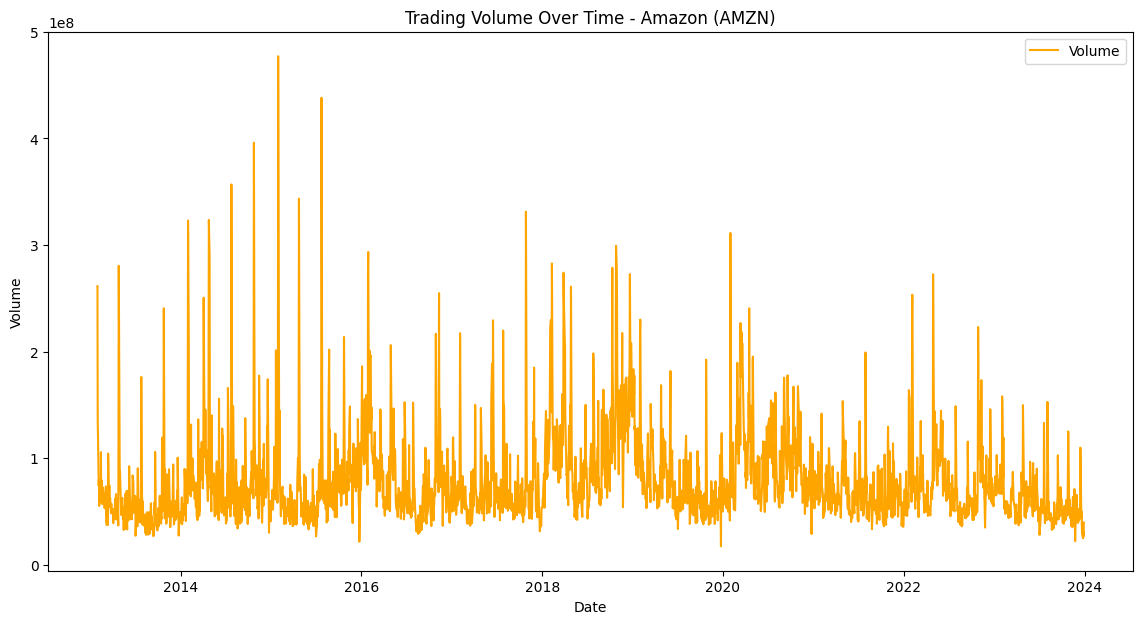

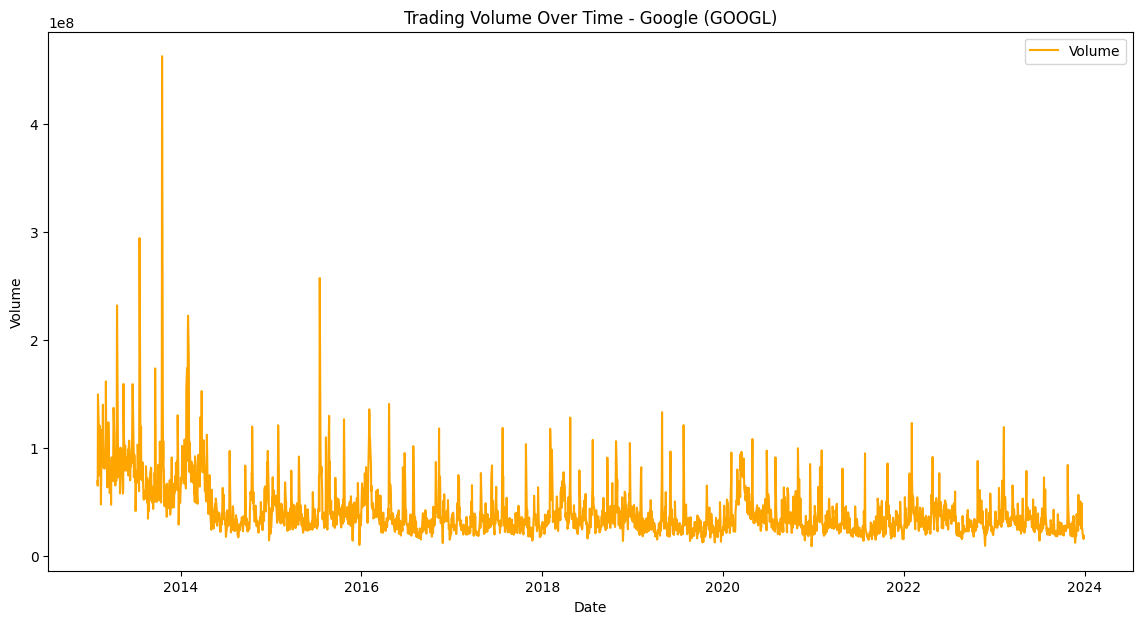

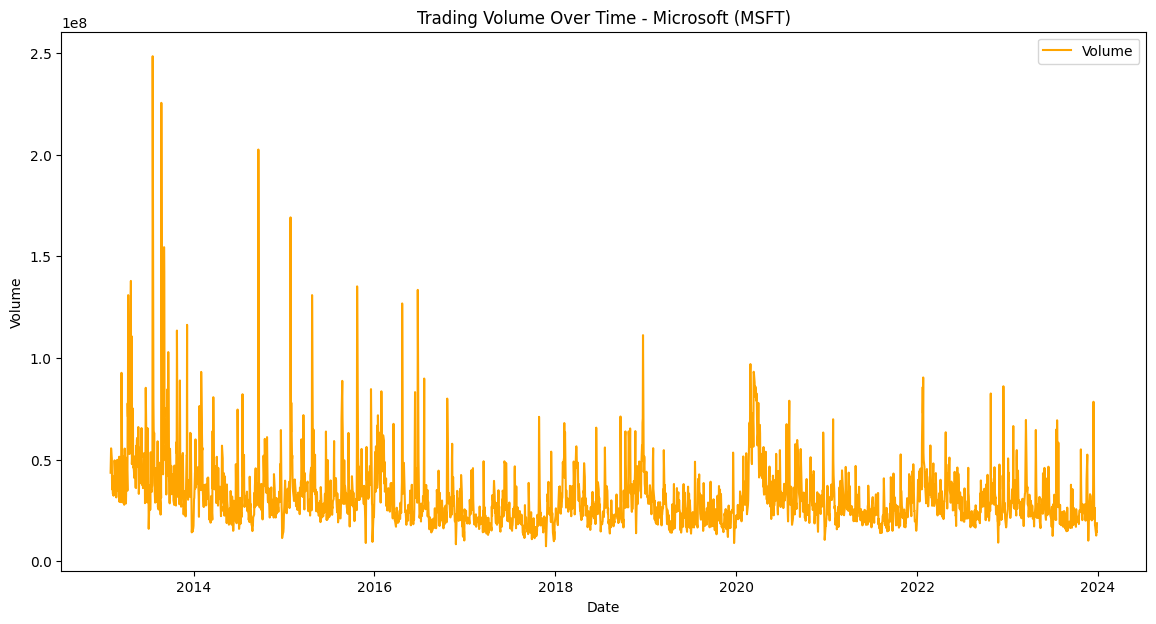

In [219]:
# Trading Volume over Time
# Loop through each dataset to plot trends
for label, df in datasets.items():

    # Plotting the trend of volume
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
    plt.title(f'Trading Volume Over Time - {label}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

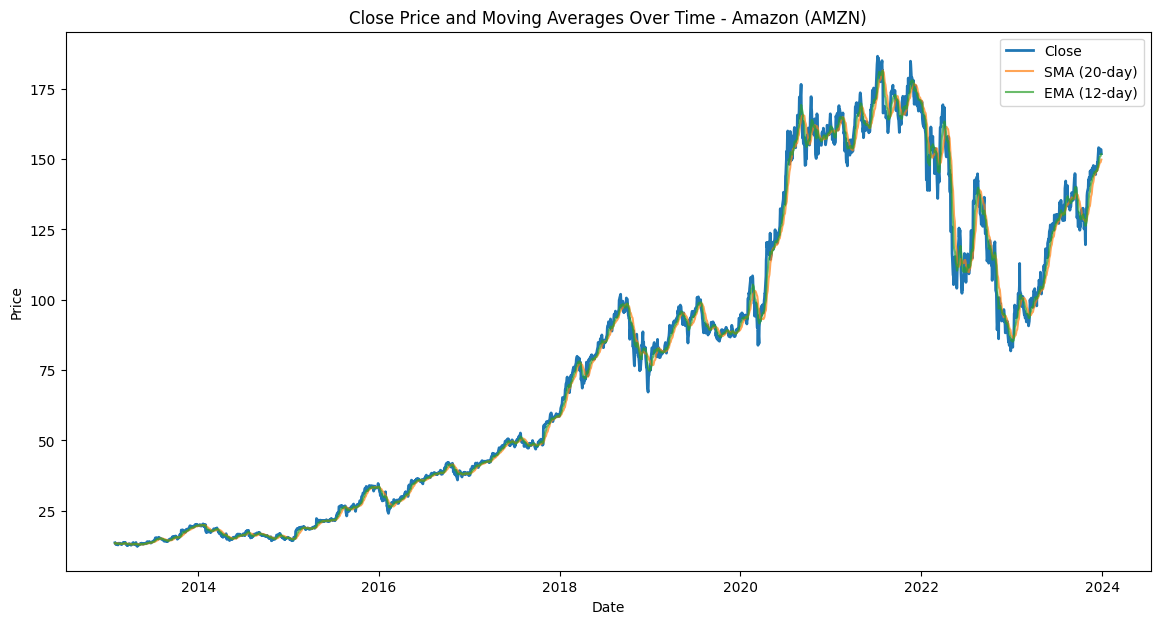

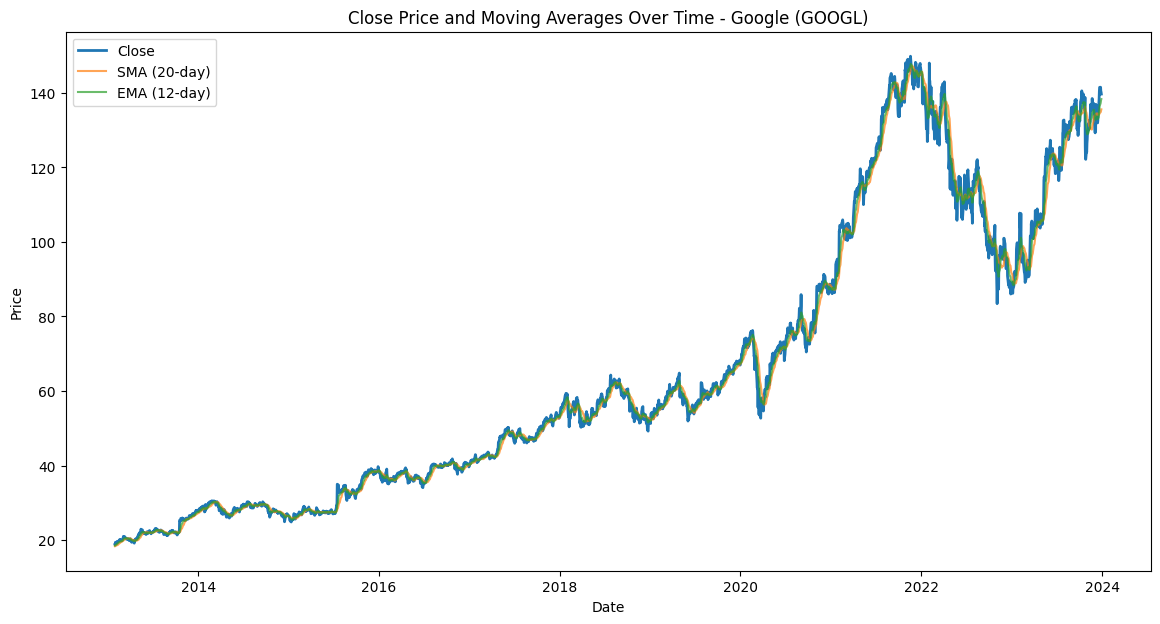

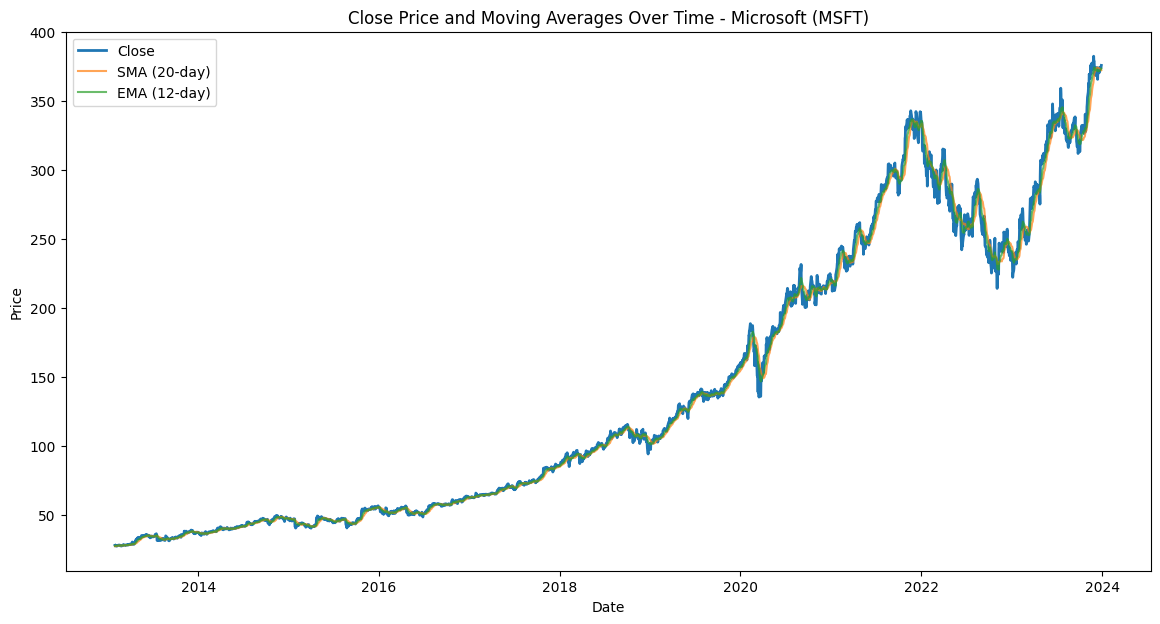

In [220]:
# Moving Average and Price
# Loop through each dataset to plot trends
for label, df in datasets.items():

    # Plotting close price, SMA, and EMA
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close', linewidth=2)
    plt.plot(df['Date'], df['SMA'], label='SMA (20-day)', alpha=0.7)
    plt.plot(df['Date'], df['EMA'], label='EMA (12-day)', alpha=0.7)
    plt.title(f'Close Price and Moving Averages Over Time - {label}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Volatility Analysis

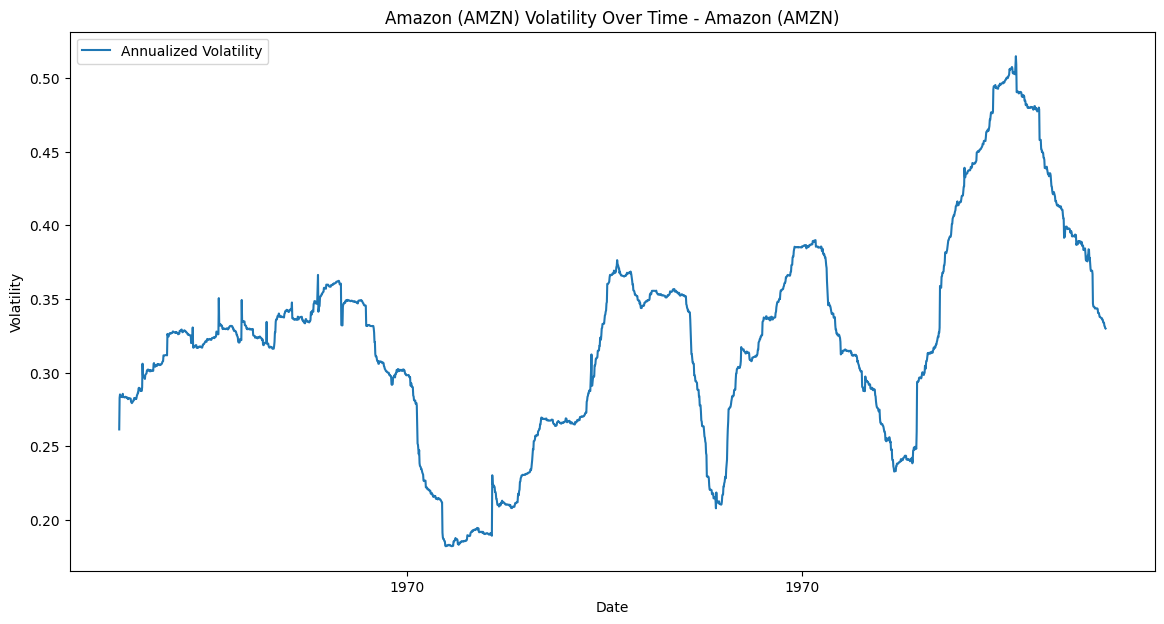

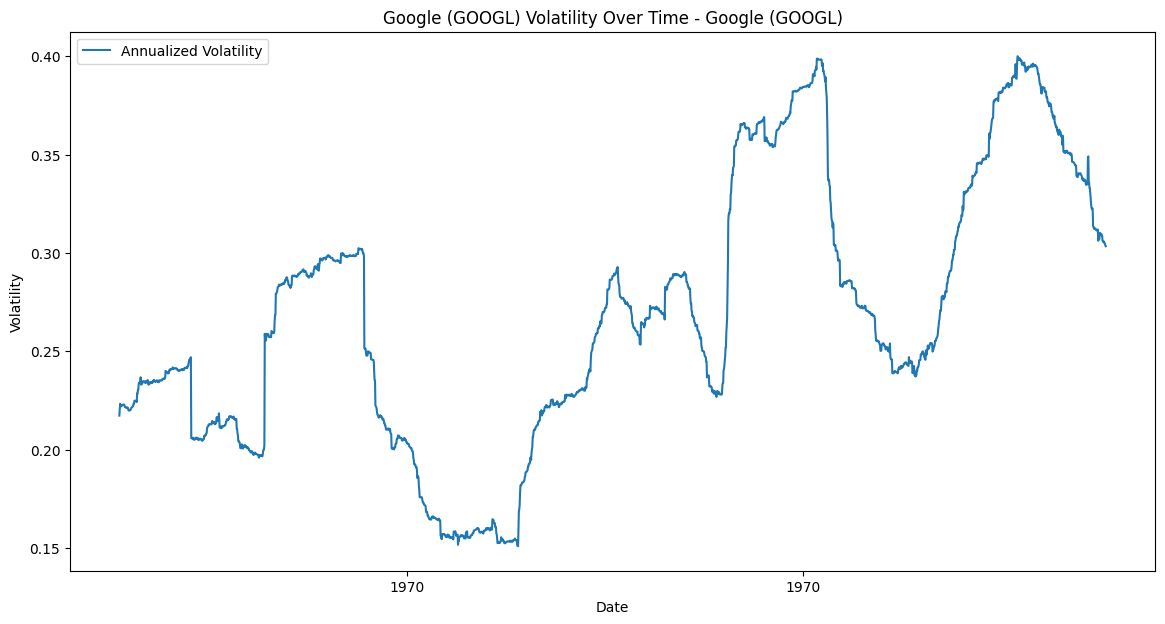

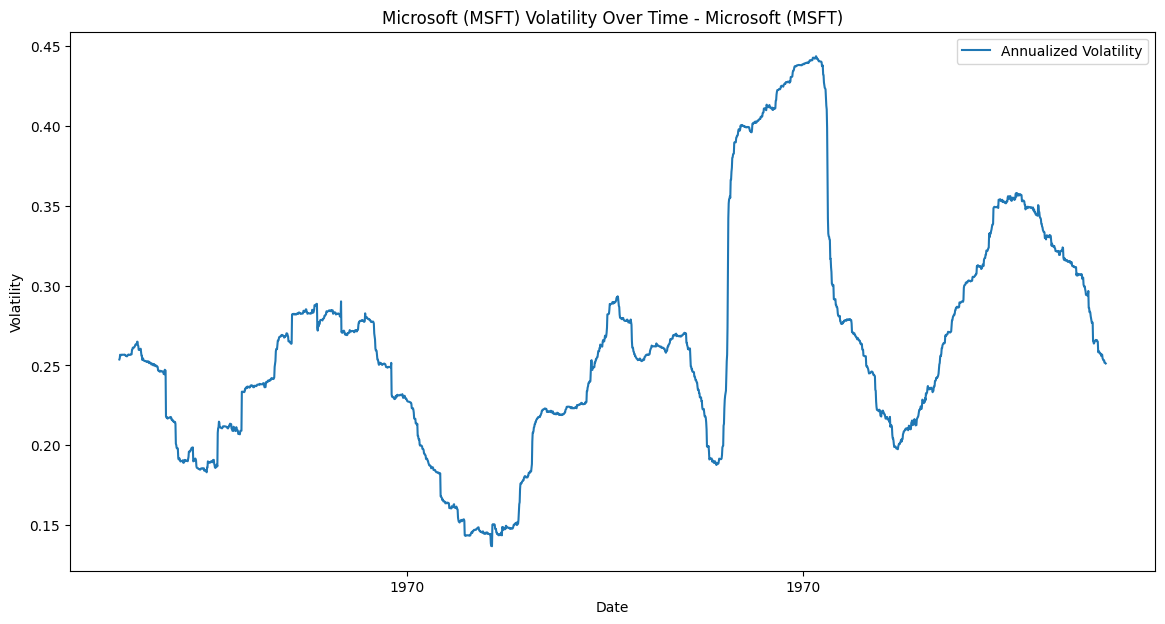

In [221]:
# Loop through each dataset to calculate returns and volatility
for label, df in datasets.items():
    # Calculate daily returns
    df['Returns'] = df['Close'].pct_change()

    # Calculate annualized volatility (standard deviation of returns * sqrt(252))
    df['Volatility'] = df['Returns'].rolling(window=252).std() * np.sqrt(252)

    # Ensure index is of datetime type for better plotting
    df.index = pd.to_datetime(df.index)

    # Plotting annualized volatility
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Volatility'], label='Annualized Volatility')
    plt.title(f'{label} Volatility Over Time - {label}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

### Correlation Heatmap

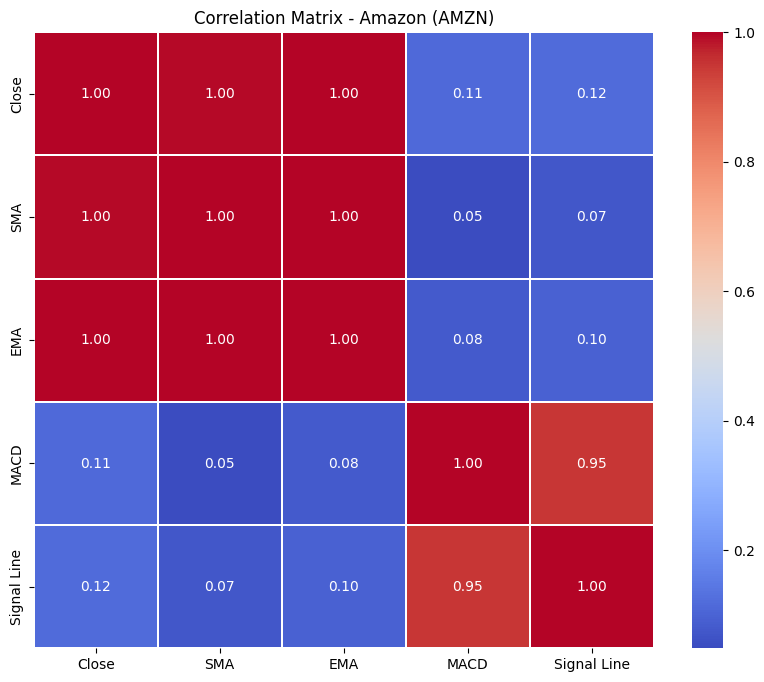

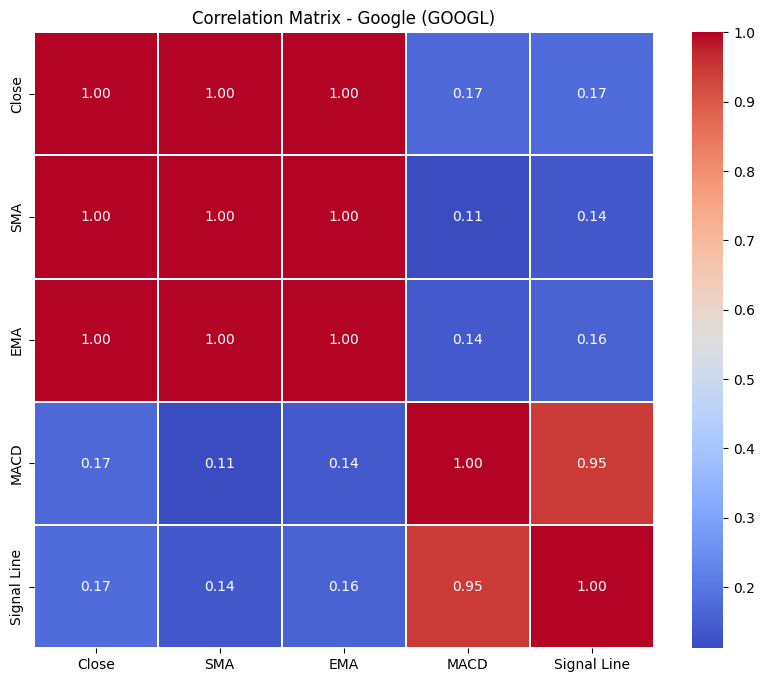

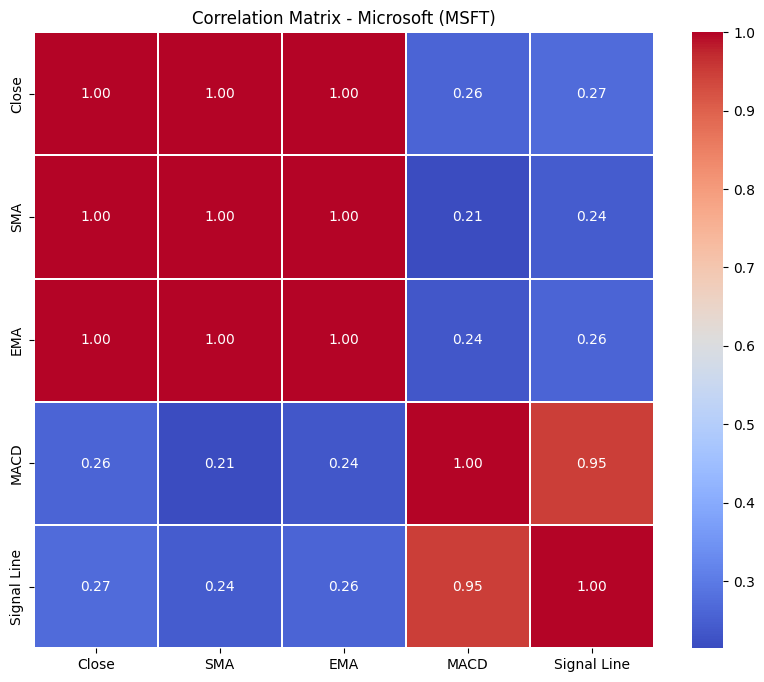

In [222]:
# Loop through each dataset to compute the correlation matrix
for label, df in datasets.items():
    # Select relevant data for correlation
    correlation_data = df[['Close', 'SMA', 'EMA', 'MACD', 'Signal Line']]

    # Compute the correlation matrix
    corr = correlation_data.corr()

    # Generate a heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
    plt.title(f'Correlation Matrix - {label}')
    plt.show()

In [223]:
amzn_df.reset_index(drop=True, inplace=True)
googl_df.reset_index(drop=True, inplace=True)
msft_df.reset_index(drop=True, inplace=True)

In [224]:
amzn_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,MACD,Signal Line,Returns,Volatility
0,2013-01-30,14.1500,14.2100,13.3555,13.6380,13.6380,261508000,13.426175,13.527232,0.161967,0.174111,NaN,NaN
1,2013-01-31,13.5520,13.7970,13.1850,13.2750,13.2750,135442000,13.446650,13.488427,0.129849,0.165259,-0.026617,NaN
2,2013-02-01,13.4465,13.4465,13.1400,13.2500,13.2500,122300000,13.462950,13.451746,0.101210,0.152449,-0.001883,NaN
3,2013-02-04,13.1390,13.2340,12.9535,12.9990,12.9990,74472000,13.465025,13.382093,0.057597,0.133479,-0.018943,NaN
4,2013-02-05,13.1000,13.4015,13.0730,13.3445,13.3445,80258000,13.461100,13.376309,0.050332,0.116849,0.026579,NaN


In [225]:
googl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,MACD,Signal Line,Returns,Volatility
0,2013-01-30,18.862362,19.042793,18.841593,18.864614,18.864614,69250680,18.346121,18.517347,0.163696,0.077188,NaN,NaN
1,2013-01-31,18.781532,18.959459,18.775024,18.911161,18.911161,65302632,18.386712,18.577934,0.182985,0.098348,0.002467,NaN
2,2013-02-01,18.973974,19.434435,18.971472,19.409409,19.409409,149694156,18.451689,18.705853,0.235759,0.125830,0.026347,NaN
3,2013-02-04,19.211460,19.281031,18.975725,18.994493,18.994493,121498380,18.478028,18.750259,0.241321,0.148928,-0.021377,NaN
4,2013-02-05,19.047297,19.297047,19.005756,19.162663,19.162663,74753172,18.516804,18.813706,0.256344,0.170411,0.008854,NaN


In [226]:
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,MACD,Signal Line,Returns,Volatility
0,2013-01-30,28.010000,28.190001,27.760000,27.850000,22.762501,43580500,27.2260,27.569285,0.130848,0.008465,NaN,NaN
1,2013-01-31,27.790001,27.969999,27.400000,27.450001,22.435575,50530000,27.2175,27.550934,0.111640,0.029100,-0.014363,NaN
2,2013-02-01,27.670000,28.049999,27.549999,27.930000,22.827892,55565900,27.2515,27.609251,0.133609,0.050002,0.017486,NaN
3,2013-02-04,27.870001,28.020000,27.420000,27.440001,22.427395,50540000,27.2865,27.583213,0.110211,0.062044,-0.017544,NaN
4,2013-02-05,27.620001,27.660000,27.360001,27.500000,22.476440,35410400,27.3270,27.570411,0.095409,0.068717,0.002187,NaN


## Feature Selection

-----------------------------------------------------------------------------

### Recursive Feature Elimination

In [227]:
# Columns to drop (non-numeric or non-relevant)
columns_to_drop = ['Adj Close', 'Returns', 'Volatility', 'Date']

# Process each dataset
for label, df in datasets.items():
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Number of features to select
n_features_to_select = 7
estimator = LinearRegression()

# Process each dataset
for label, df in datasets.items():
    # Initialize RFE with the estimator
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)

    # Assume 'Close' is the target variable, verify your dataframe to adjust as needed
    if 'Close' in df.columns:
        X = df.drop(columns=['Close'])
        y = df['Close']
        selector = selector.fit(X, y)

        # Get the ranking of features and select the top ones
        ranking = selector.ranking_
        top_features = X.columns[ranking == 1]

        print(f"Top features selected by RFE for {label}:", top_features)
    else:
        print(f"No 'Close' column found in {label}, skipping RFE.")

Top features selected by RFE for Amazon (AMZN): Index(['Open', 'High', 'Low', 'SMA', 'EMA', 'MACD', 'Signal Line'], dtype='object')
Top features selected by RFE for Google (GOOGL): Index(['Open', 'High', 'Low', 'SMA', 'EMA', 'MACD', 'Signal Line'], dtype='object')
Top features selected by RFE for Microsoft (MSFT): Index(['Open', 'High', 'Low', 'SMA', 'EMA', 'MACD', 'Signal Line'], dtype='object')


In [228]:
# Columns to be dropped
columns_to_drop = ['Volume']

# Process each dataset
for label, df in datasets.items():
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [229]:
amzn_df.head()

,Open,High,Low,Close,SMA,EMA,MACD,Signal Line
0,14.1500,14.2100,13.3555,13.6380,13.426175,13.527232,0.161967,0.174111
1,13.5520,13.7970,13.1850,13.2750,13.446650,13.488427,0.129849,0.165259
2,13.4465,13.4465,13.1400,13.2500,13.462950,13.451746,0.101210,0.152449
3,13.1390,13.2340,12.9535,12.9990,13.465025,13.382093,0.057597,0.133479
4,13.1000,13.4015,13.0730,13.3445,13.461100,13.376309,0.050332,0.116849


In [230]:
googl_df.head()

,Open,High,Low,Close,SMA,EMA,MACD,Signal Line
0,18.862362,19.042793,18.841593,18.864614,18.346121,18.517347,0.163696,0.077188
1,18.781532,18.959459,18.775024,18.911161,18.386712,18.577934,0.182985,0.098348
2,18.973974,19.434435,18.971472,19.409409,18.451689,18.705853,0.235759,0.125830
3,19.211460,19.281031,18.975725,18.994493,18.478028,18.750259,0.241321,0.148928
4,19.047297,19.297047,19.005756,19.162663,18.516804,18.813706,0.256344,0.170411


In [231]:
msft_df.head()

,Open,High,Low,Close,SMA,EMA,MACD,Signal Line
0,28.010000,28.190001,27.760000,27.850000,27.2260,27.569285,0.130848,0.008465
1,27.790001,27.969999,27.400000,27.450001,27.2175,27.550934,0.111640,0.029100
2,27.670000,28.049999,27.549999,27.930000,27.2515,27.609251,0.133609,0.050002
3,27.870001,28.020000,27.420000,27.440001,27.2865,27.583213,0.110211,0.062044
4,27.620001,27.660000,27.360001,27.500000,27.3270,27.570411,0.095409,0.068717


In [232]:
# Save the cleaned datasets into separate CSV files
amzn_df.to_csv('AMZN_cleaned.csv', index=False)
googl_df.to_csv('GOOGL_cleaned.csv', index=False)
msft_df.to_csv('MSFT_cleaned.csv', index=False)

print("Datasets saved successfully.")

Datasets saved successfully.
